In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image
from IPython.display import display
imshowg = lambda x: plt.imshow(x,cmap=plt.get_cmap('gray'))
conv2D = lambda x,k: cv2.filter2D(x, -1, k)

In [3]:
img_in  = cv2.imread('example.jpg',cv2.IMREAD_GRAYSCALE)

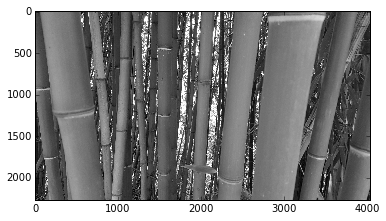

In [4]:
imshowg(img_in)

Convolution can be performed in several ways:
* Numpy: np.convolve works on 1D
* OpenCV: filter2D
* Separable
* Frequency Space
* Matlab filter2d or imfilter for correlation, conv2 for convolution == filter2(rot90(f,2),I)


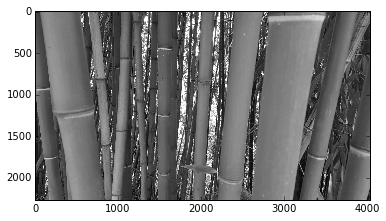

In [13]:
img = conv2D(img_in, 1.0/9*np.ones((3,3)))

imshowg(img)

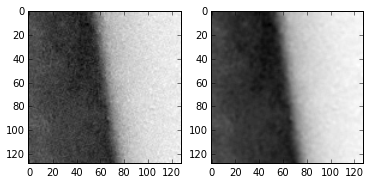

In [6]:
s = 128
plt.subplot(1,2,1)
imshowg(img_in[0:s,0:s])
plt.subplot(1,2,2)
imshowg(img[0:s,0:s])


Explore the following filters
* [[0,0,0],[0,1,0],[0,0,0]]
* [[0,0,0],[0,0,1],[0,0,0]]
* [[1,0,-1],[2,0,-2],[1,0,-1]]
* [[0,0,0],[0,2,0],[0,0,0]] - 1.0/9*np.ones((3,3))
* [[0,1,0],[1,-4,1],[0,1,0]]
* [[-2,-1,0],[-1,1,1],[0,1,2]]

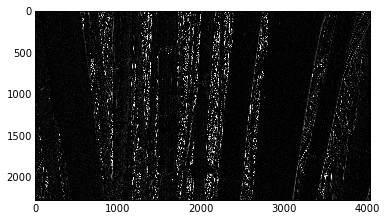

In [7]:
img = conv2D(img_in, np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=np.float64))
imshowg(img)

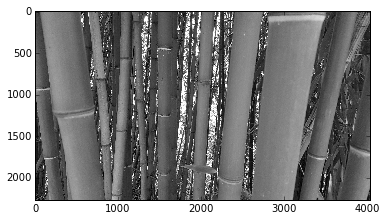

In [8]:
img = conv2D(img_in, np.array([[0,0,0],[0,2,0],[0,0,0]],dtype=np.float64)- 1.0/9*np.ones((3,3)))
imshowg(img)

Other playgrounds:
* GIMP Filters | Generic | Convolution Matrix / max 5x5 - https://docs.gimp.org/en/plug-in-convmatrix.html
* http://setosa.io/ev/image-kernels/

# Filter Separability
Given an image MxN and a filter PxQ the full 2D convolution costs MNPQ operations, but if we can separate the filter in two parts Px1 and 1xQ we can reduce this to MNP plus MNQ that is MN(P+Q). For the common case K=P=Q we have O(K^2) and O(K).

* cv2.sepFilter2D(src, ddepth, kernelX, kernelY[, dst[, anchor[, delta[, borderType]]]])

Note: other specialization: symmetric normalized ones


# Properties
Properties of Convolutions
* Commutability
* Associability
* Distribution
* Scaling

# Gaussian Filter
Special filter connected to perceptual capabilities
![title](img/gaussian.png)

This is a low-pass separable filter
![title](img/gaussianeq.png)


In Python:
* cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) 
* cv2.getGaussianKernel(ksize, sigma[, ktype])

The first performs the high-level transformation using the function sepFilter2D, the second provides the 1D filter. We'll use this to explain the Gaussian Filter.

How to set ksize given sigma? ksize/2 = int(3 sigma)

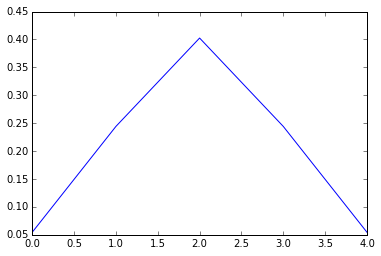

In [9]:
fi = cv2.getGaussianKernel(5, 1)
plt.plot(fi)

((5, 5), (1, 5))


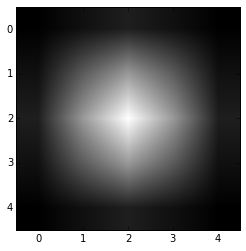

In [10]:
fi2 = fi * fi.T
print(fi2.shape,fi.T.shape)
imshowg(fi2)

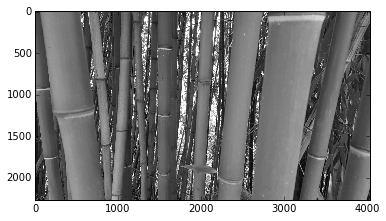

In [11]:
img_f2c = conv2D(img_in,fi2)
imshowg(img_f2c)

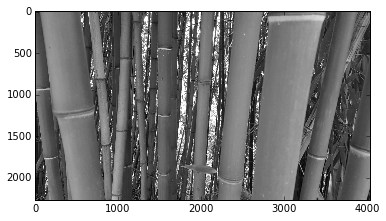

In [12]:
img_f2 = cv2.sepFilter2D(img_in, -1, fi, fi)
imshowg(img_f2)

# Convolution in Neural Network

A breaktrhough in Neural Network application to computer vision is the one of CNN, inspired to the receptive field of the human vision system. These networks are effective in computing a custom feature that is extracted via the CNN kernel. In particular the filter kernel is learned.

In general this brings to the case of  "Learning Separable Filters", Rigamenti et al. 2013
http://cvlabwww.epfl.ch/~lepetit/papers/rigamonti_cvpr13.pdf

We'll talk later about CNN, for the moment you can look at http://deeplearning.net/tutorial/lenet.html
